In [1]:
from newscatcher import Newscatcher
import pandas as pd
from datetime import datetime

In [2]:
all_headlines_csv = 'data/google-news-headlines.csv'
all_df_headlines = pd.read_csv(all_headlines_csv)

In [3]:
now = datetime.utcnow().strftime('%Y-%m-%d %H:%M')
now

'2020-02-28 18:05'

In [4]:
# get the current headlines
ns = Newscatcher('news.google.com')
df_latest = pd.DataFrame({'datetime': now, 'headline': ns.headlines})

In [5]:
df_latest

,datetime,headline
0,2020-02-28 18:05,Trump says Democrats are blaming him for coron...
1,2020-02-28 18:05,WHO increases coronavirus risk to 'very high';...
2,2020-02-28 18:05,Rep. Jim Clyburn says Democrats are concerned ...
3,2020-02-28 18:05,Sen. Lindsey Graham: Biden will win SC primary...
4,2020-02-28 18:05,Media Covering Coronavirus to ‘Bring Down the ...
5,2020-02-28 18:05,Bloomberg says he will run 'right to the bitte...
6,2020-02-28 18:05,Post-debate poll: Viewers say Bernie Sanders m...
7,2020-02-28 18:05,"Main Street leans toward Sanders, but Wall Str..."
8,2020-02-28 18:05,Pence is leading the coronavirus response but ...
9,2020-02-28 18:05,Education department says USC failed to protec...


In [6]:
# merge with the old one
all_df_headlines = all_df_headlines.append(df_latest, sort=True)


In [7]:
all_df_headlines.drop_duplicates(['headline'], inplace=True)

In [8]:
# save all headlines  to file
all_df_headlines.to_csv(all_headlines_csv, index=False)

In [9]:
# is_virus is 1 if there is reference to coronavirus
all_df_headlines['is_virus']= (
    all_df_headlines['headline']
    .apply(lambda v: 1 
           if ('coronavirus' in v.lower()) or ('covid-19' in v.lower())
           else 0)
)

In [10]:
# cumu sum of number of references to virus
all_df_headlines['total_virus'] = all_df_headlines['is_virus'].cumsum()

In [11]:
df_latest_samples = all_df_headlines[all_df_headlines['is_virus']==1].tail(5)
df_latest_samples[['headline']]

,headline
13,"If coronavirus spreads within the US, here's h..."
15,Goldman expects three Fed rate cuts starting i...
16,"Stocks, Dow Sink As Coronavirus Fears Continue..."
34,Are pregnant women at risk for coronavirus? - ...
35,Intense search underway in California for othe...


In [12]:
# plot chart number of headline mentioning coronavirus
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

png_file = 'images/google-news-headlines.png'
# convert to pd.datetime
all_df_headlines['datetime_idx'] = pd.to_datetime(all_df_headlines['datetime'], format="%Y-%m-%d %H:%M")
all_df_headlines.set_index('datetime_idx', inplace=True)


In [13]:
all_df_headlines

,datetime,headline,is_virus,total_virus
datetime_idx,,,,
2020-02-27 19:51:00,2020-02-27 19:51,The 31 wildest lines from Donald Trump's self-...,1,1
2020-02-27 21:14:00,2020-02-27 21:14,Coronavirus: Outbreak at 'decisive point' as W...,1,2
2020-02-27 21:14:00,2020-02-27 21:14,Shooter at Milwaukee Molson Coors had a long-r...,0,2
2020-02-27 21:14:00,2020-02-27 21:14,Democratic Leaders Willing to Risk Party Damag...,0,2
2020-02-27 21:14:00,2020-02-27 21:14,"Catherine Pugh, Former Baltimore Mayor, Senten...",0,2
...,...,...,...,...
2020-02-28 18:05:00,2020-02-28 18:05,2020 NFL combine: Winners and losers from rece...,0,163
2020-02-28 18:05:00,2020-02-28 18:05,Trump Voters Big Mad at Garth Brooks Because T...,0,163
2020-02-28 18:05:00,2020-02-28 18:05,Are pregnant women at risk for coronavirus? - ...,1,164


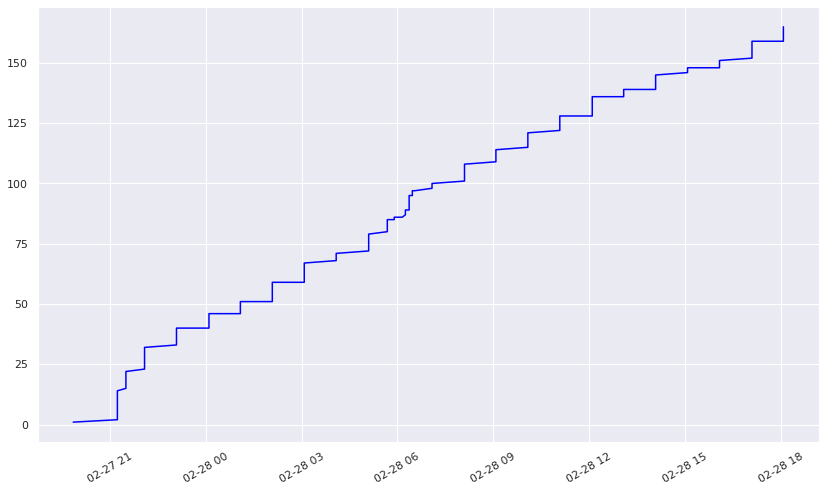

In [14]:
sns.set(rc={'figure.figsize':(14,8)})

fig, axs = plt.subplots(nrows=1)

sns.lineplot(x=all_df_headlines.index, y = 'total_virus', data=all_df_headlines, ax= axs, estimator=None, color='blue')

axs.set_xlabel('')
axs.set_ylabel('')
axs.tick_params(axis='x', labelrotation=30)

In [15]:
fig.savefig(png_file)
